In [2]:
# Cabochaがインストールできなかったので、美齊津くんからai.ja.txt.parsedをもらいました。
# 先頭10行の確認
with open('./ai.ja.txt.parsed', 'r', encoding='utf-8') as file:
	for _ in range(10):
		print(file.readline().strip())

* 0 -1D 1/1 0.000000
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
EOS
EOS
* 0 17D 1/1 0.388993
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
* 1 17D 2/3 0.613549
（	記号,括弧開,*,*,*,*,（,（,（


**40. 係り受け解析結果の読み込み（形態素）**\
形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，係り受け解析の結果（ai.ja.txt.parsed）を読み込み，各文をMorphオブジェクトのリストとして表現し，冒頭の説明文の形態素列を表示せよ

In [3]:

class Morph:
  def __init__(self, line):
    surface, other = line.split("\t") #タブで分割
    other = other.split(",") #カンマで分割
    self.surface = surface #表層形
    self.base = other[-3] #基本形
    self.pos = other[0] #品詞
    self.pos1 = other[1] #品詞細分類1
 
sentences = [] #文リスト
morphs = [] #形態素リスト
 
with open("./ai.ja.txt.parsed", "r", encoding="utf-8") as f:
  for line in f:
    if line[0] == "*": #*で始まる行はスキップ
      continue
    elif line != "EOS\n": #文末以外の行は形態素解析結果なので、Morphクラスに変換してmorphsに追加
      morphs.append(Morph(line))
    else:  #EOS（文末）の場合、morphsリストをsentencesリストに追加
      sentences.append(morphs)
      morphs = []
for sentence in sentences:
    for morph in sentence:
        print(vars(morph)) #vars()を使用して、冒頭の説明文の形態素列を表示する


{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}
{'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}
{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}
{'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}
{'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': 'AI', 'base': '*', 'pos': '名詞', 'pos1': '一般'}
{'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'エーアイ', 'base': '*', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '〉', 'base': '〉', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': '）', 'base': '）', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'

**41. 係り受け解析結果の読み込み（文節・係り受け）**\
40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストの係り受け解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，冒頭の説明文の文節の文字列と係り先を表示せよ．本章の残りの問題では，ここで作ったプログラムを活用せよ．

In [4]:

class Sentence:
  def __init__(self, chunks):
    self.chunks = chunks
    for i, chunk in enumerate(self.chunks): #文節番号と係り先文節番号から、係り元文節リストを作成
      if chunk.dst not in [None, -1]:
        self.chunks[chunk.dst].srcs.append(i)
 
class Chunk:
  def __init__(self, morphs, dst, chunk_id):
    self.morphs = morphs
    self.dst = dst 
    self.srcs = []
    self.chunk_id = chunk_id
 
class Morph:
  def __init__(self, line):
    surface, other = line.split("\t")
    other = other.split(",")
    self.surface = surface
    self.base = other[-3]
    self.pos = other[0]
    self.pos1 = other[1]
 
sentences = [] #文リスト
chunks = [] #節リスト
morphs = [] #形態素リスト
chunk_id = 0 #文節番号
 
with open("./ai.ja.txt.parsed", "r", encoding="utf-8") as f:
  for line in f:
    if line[0] == "*": #*で始まる行は文節情報なので、Chunkクラスに変換してchunksに追加
      if morphs:
        chunks.append(Chunk(morphs, dst, chunk_id))
        chunk_id += 1
        morphs = []
      dst = int(line.split()[2].replace("D", ""))
    elif line != "EOS\n": #文末以外の行は形態素解析結果なので、Morphクラスに変換してmorphsに追加
      morphs.append(Morph(line))
    else: #EOS（文末）の場合、Chunkクラスに変換してchunksに追加し、Sentenceクラスにchunksを追加
      chunks.append(Chunk(morphs, dst, chunk_id))
      sentences.append(Sentence(chunks))
 
      morphs = []
      chunks = []
      dst = None
      chunk_id = 0
 
for chunk in sentences[2].chunks:
  chunk_str = "".join([morph.surface for morph in chunk.morphs])
  print(chunk_str, chunk.dst, chunk.srcs)

人工知能 17 []
（じんこうちのう、、 17 []
AI 3 []
〈エーアイ〉）とは、 17 [2]
「『計算 5 []
（）』という 9 [4]
概念と 9 []
『コンピュータ 8 []
（）』という 9 [7]
道具を 10 [5, 6, 8]
用いて 12 [9]
『知能』を 12 []
研究する 13 [10, 11]
計算機科学 14 [12]
（）の 15 [13]
一分野」を 16 [14]
指す 17 [15]
語。 34 [0, 1, 3, 16]
「言語の 20 []
理解や 20 []
推論、 21 [18, 19]
問題解決などの 22 [20]
知的行動を 24 [21]
人間に 24 []
代わって 26 [22, 23]
コンピューターに 26 []
行わせる 27 [24, 25]
技術」、または、 34 [26]
「計算機 29 []
（コンピュータ）による 31 [28]
知的な 31 []
情報処理システムの 33 [29, 30]
設計や 33 []
実現に関する 34 [31, 32]
研究分野」とも 35 [17, 27, 33]
される。 -1 [34]


**42. 係り元と係り先の文節の表示**\
係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [5]:
for chunk in sentences[2].chunks:
  if int(chunk.dst) == -1: #係り先がない場合はスキップ
    continue
  else: #係り先がある場合は、文節内の各表層形を連結
    surf = "".join([morph.surface for morph in chunk.morphs if morph.pos != "記号"]) #surf変数:分節内のテキストを連結させる
    next_surf = "".join([morph.surface for morph in sentences[2].chunks[int(chunk.dst)].morphs if morph.pos != "記号"])  #next_surf変数:係り先の分節内のテキストを連結させる
    print(f"{surf}\t{next_surf}")

人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語
語	研究分野とも
言語の	推論
理解や	推論
推論	問題解決などの
問題解決などの	知的行動を
知的行動を	代わって
人間に	代わって
代わって	行わせる
コンピューターに	行わせる
行わせる	技術または
技術または	研究分野とも
計算機	コンピュータによる
コンピュータによる	情報処理システムの
知的な	情報処理システムの
情報処理システムの	実現に関する
設計や	実現に関する
実現に関する	研究分野とも
研究分野とも	される


**43. 名詞を含む文節が動詞を含む文節に係るものを抽出**\
名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [6]:
for chunk in sentences[2].chunks:
  if int(chunk.dst) == -1:
    continue
  else:
    surf = "".join([morph.surface for morph in chunk.morphs if morph.pos != "記号"])
    next_surf = "".join([morph.surface for morph in sentences[2].chunks[int(chunk.dst)].morphs if morph.pos != "記号"]) 
    pos_noun = [morph.surface for morph in chunk.morphs if morph.pos == "名詞"] # 名詞を含む文節の表層形を取得
    pos_verb = [morph.surface for morph in sentences[2].chunks[int(chunk.dst)].morphs if morph.pos == "動詞"] # 動詞を含む文節の表層形を取得
    if pos_noun and pos_verb: # 名詞を含む文節と動詞を含む文節がある場合(両方True)にタブ区切りで出力
      print(f"{surf}\t{next_surf}")

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される


**44. 係り受け木の可視化**\
与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，Graphviz等を用いるとよい.

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


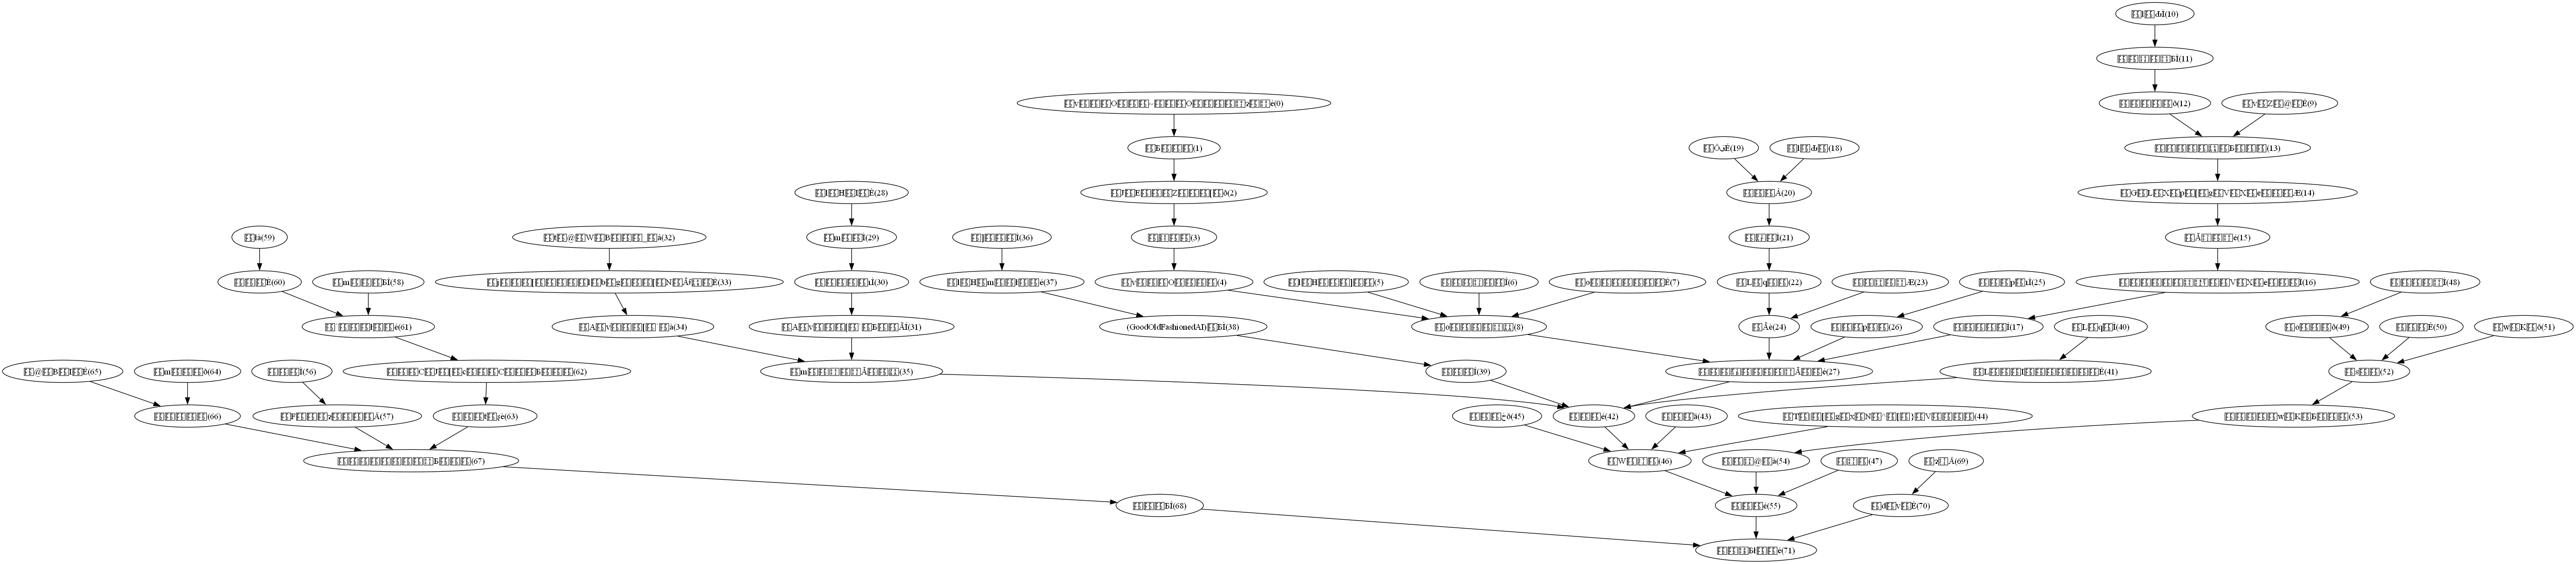

In [ ]:
#ローカルの場合は、Graphvizのダウンロードが必要
%pip install graphviz

import pydot
from IPython.display import Image, display_png
from graphviz import Digraph

sentence = sentences[7]
edges = []
for id, chunk in enumerate(sentence.chunks):
    if int(chunk.dst) != -1:
        modifier = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs] + ['(' + str(id) + ')'])
        modifiee = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentence.chunks[int(chunk.dst)].morphs] + ['(' + str(chunk.dst) + ')'])
        edges.append([modifier, modifiee])

n = pydot.Node('node')
n.fontname = 'IPAGothic'
g = pydot.Dot(graph_type='digraph')
for edge in edges:
    g.add_edge(pydot.Edge(edge[0], edge[1]))
g.add_node(n)
g.write_png('./ans44.png')
display_png(Image('./ans44.png'))

**45. 動詞の格パターンの抽出**\
今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．

動詞を含む文節において，最左の動詞の基本形を述語とする
述語に係る助詞を格とする
述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

作り出す	で は を

このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

コーパス中で頻出する述語と格パターンの組み合わせ
「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）

In [8]:

with open('./ans45.txt', 'w', encoding='utf-8') as f:
  for sentence in sentences:
    for chunk in sentence.chunks:
      for morph in chunk.morphs:
        if morph.pos == '動詞':  # chunkの左から順番に動詞を探す
          cases = []
          for src in chunk.srcs:  # 見つけた動詞の係り元chunkから助詞を探す
            cases = cases + [morph.surface for morph in sentence.chunks[src].morphs if morph.pos == '助詞'] # 助詞を見つけたらリストに追加
          if len(cases) > 0:  # 助詞が1つ以上見つかった場合は、動詞と助詞をタブ区切りで出力
            cases = sorted(list(set(cases))) #setで重複を除去
            line = f"{morph.base}\t{' '.join(cases)}" #リスト内の要素をスペース区切りで連結
            print(line, file=f)
          break

In [9]:
with open('./ans45.txt', 'r', encoding='utf-8') as f:
    for _ in range(5):
        print(f.readline().strip())

用いる	を
する	て を
指す	を
代わる	に を
行う	て に


**46. 動詞の格フレーム情報の抽出Permalink**\
45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．

項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）
述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

作り出す	で は を	会議で ジョンマッカーシーは 用語を


In [10]:
with open('./ans46.txt', 'w', encoding='utf-8') as f:
  for sentence in sentences:
    for chunk in sentence.chunks:
      for morph in chunk.morphs:
        if morph.pos == '動詞':  # chunkの左から順番に動詞を探す
          cases = [] #助詞リスト
          modi_chunks = [] #助詞を含む文節リスト
          for src in chunk.srcs:  # 見つけた動詞の係り元chunkから助詞を探す
            case1 = [morph.surface for morph in sentence.chunks[src].morphs if morph.pos == '助詞'] # 助詞を見つけたらリストに追加
            if len(case1) > 0:  # 助詞が1つ以上見つかった場合は、助詞リストと助詞を含む文節リストに追加
              cases = case1 + cases #助詞リストに追加
              modi_chunks.append(''.join(morph.surface for morph in sentence.chunks[src].morphs if morph.pos != '記号')) #助詞を含む文節リストに追加
          if len(cases) > 0: # 助詞が1つ以上見つかった場合は、動詞と助詞をタブ区切りで出力
            cases = sorted(list(set(cases)))
            line = f"{morph.base}\t{' '.join(cases)}\t{' '.join(modi_chunks)}"
            print(line, file=f)
          break
 

In [11]:
with open('./ans46.txt', 'r', encoding='utf-8') as f:
    for _ in range(5):
        print(f.readline().strip())

用いる	を	道具を
する	て を	用いて 知能を
指す	を	一分野を
代わる	に を	知的行動を 人間に
行う	て に	代わって コンピューターに


**47. 機能動詞構文のマイニング**\
動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．

「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる
述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）
例えば「また、自らの経験を元に学習を行う強化学習という手法もある。」という文から，以下の出力が得られるはずである．

学習を行う	に を	元に 経験を

In [12]:
with open('./ans47.txt', 'w', encoding='utf-8') as f:
  for sentence in sentences:
    for chunk in sentence.chunks:
      for morph in chunk.morphs:
        if morph.pos == '動詞':  # chunkの左から順番に動詞を探す
          for i, src in enumerate(chunk.srcs):  # 見つけた動詞の係り元chunkが「サ変接続名詞+を」で構成されるか確認
            if len(sentence.chunks[src].morphs) == 2 and sentence.chunks[src].morphs[0].pos1 == 'サ変接続' and sentence.chunks[src].morphs[1].surface == 'を': #サ変接続名詞+をの場合
              predicate = ''.join([sentence.chunks[src].morphs[0].surface, sentence.chunks[src].morphs[1].surface, morph.base]) #動詞とサ変接続名詞+をを結合
              cases = []
              modi_chunks = []
              for src_r in chunk.srcs[:i] + chunk.srcs[i + 1:]:  # 残りの係り元chunkから助詞を探す
                case1 = [morph.surface for morph in sentence.chunks[src_r].morphs if morph.pos == '助詞'] # 助詞を見つけたらリストに追加
                if len(case1) > 0:  # 助詞を含むchunkの場合は助詞と項を取得
                  cases = cases + case1
                  modi_chunks.append(''.join(morph.surface for morph in sentence.chunks[src_r].morphs if morph.pos != '記号'))
              if len(cases) > 0:  # 助詞が1つ以上見つかった場合は重複除去後辞書順にソートし、項と合わせて出力
                cases = sorted(list(set(cases)))
                line = '{}\t{}\t{}'.format(predicate, ' '.join(cases), ' '.join(modi_chunks))
                print(line, file=f)
              break

In [13]:
with open('./ans47.txt', 'r', encoding='utf-8') as f:
    for _ in range(5):
        print(f.readline().strip())

記述をする	と	主体と
注目を集める	が	サポートベクターマシンが
経験を行う	に を	元に 学習を
進化を見せる	て において は	活躍している 敵対的生成ネットワークは 加えて 生成技術において
進化をいる	て において は	活躍している 敵対的生成ネットワークは 加えて 生成技術において


**48. 名詞から根へのパスの抽出**\
文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．

各文節は（表層形の）形態素列で表現する
パスの開始文節から終了文節に至るまで，各文節の表現を” -> “で連結する
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．

ジョンマッカーシーは -> 作り出した

AIに関する -> 最初の -> 会議で -> 作り出した

最初の -> 会議で -> 作り出した

会議で -> 作り出した

人工知能という -> 用語を -> 作り出した

用語を -> 作り出した

In [14]:
#構文木　＝　係り受け解析結果を木構造で表現したもの
sentence = sentences[2]
for chunk in sentence.chunks:
  if '名詞' in [morph.pos for morph in chunk.morphs]:  # chunkが名詞を含むか確認
    path = [''.join(morph.surface for morph in chunk.morphs if morph.pos != '記号')] #名詞を含む文節内の単語を結合
    while chunk.dst != -1:  # 名詞を含むchunkを先頭に、dstを根まで順に辿ってリストに追加
      path.append(''.join(morph.surface for morph in sentence.chunks[chunk.dst].morphs if morph.pos != '記号'))
      chunk = sentence.chunks[chunk.dst]
    print(' -> '.join(path))

人工知能 -> 語 -> 研究分野とも -> される
じんこうちのう -> 語 -> 研究分野とも -> される
AI -> エーアイとは -> 語 -> 研究分野とも -> される
エーアイとは -> 語 -> 研究分野とも -> される
計算 -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
概念と -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
コンピュータ -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
知能を -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
一分野を -> 指す -> 語 -> 研究分野とも -> される
語 -> 研究分野とも -> される
言語の -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
理解や -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
人間に -> 代わって -> 行わせる -> 技術または -> 研究

**49. 名詞間の係り受けパスの抽出**\
文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号がi
とj（i< j）のとき，係り受けパスは以下の仕様を満たすものとする．

問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を” -> “で連結して表現する

文節iとjに含まれる名詞句はそれぞれ，XとYに置換する

また，係り受けパスの形状は，以下の2通りが考えられる．

文節iから構文木の根に至る経路上に文節jが存在する場合: 文節iから文節jのパスを表示
上記以外で，文節iと文節jから構文木の根に至る経路上で共通の文節kで交わる場合: 文節iから文節k
に至る直前のパスと文節jから文節kに至る直前までのパス，文節kの内容を” | “で連結して表示

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．

Xは | Yに関する -> 最初の -> 会議で | 作り出した

Xは | Yの -> 会議で | 作り出した

Xは | Yで | 作り出した

Xは | Yという -> 用語を | 作り出した

Xは | Yを | 作り出した

Xに関する -> Yの

Xに関する -> 最初の -> Yで

Xに関する -> 最初の -> 会議で | Yという -> 用語を | 作り出した

Xに関する -> 最初の -> 会議で | Yを | 作り出した

Xの -> Yで

Xの -> 会議で | Yという -> 用語を | 作り出した

Xの -> 会議で | Yを | 作り出した

Xで | Yという -> 用語を | 作り出した

Xで | Yを | 作り出した

Xという -> Yを

In [15]:
from itertools import combinations
import re

sentence = sentences[2]
nouns = []
for i, chunk in enumerate(sentence.chunks):
  if '名詞' in [morph.pos for morph in chunk.morphs]:  # 名詞を含む文節を抽出
    nouns.append(i)
for i, j in combinations(nouns, 2):  # 名詞を含む文節のペアごとにパスを作成
  path_i = [] #文節iの構文木経路
  path_j = [] #文節jの構文木経路
  while i != j: 
    if i < j: #文節iの構文木経路上に文節jが存在する場合
      path_i.append(i) #文節iをpath_iに追加
      i = sentence.chunks[i].dst
    else:  #文節iの構文木経路上に文節jがない場合
      path_j.append(j) #文節jをpath_jに追加
      j = sentence.chunks[j].dst
  if len(path_j) == 0:  # 文節iの構文木の根に至る経路上に文節jが存在する場合
    chunk_X = ''.join([morph.surface if morph.pos != '名詞' else 'X' for morph in sentence.chunks[path_i[0]].morphs]) #hunk_Xは、文節iの構文木経路の先頭の文節
    chunk_Y = ''.join([morph.surface if morph.pos != '名詞' else 'Y' for morph in sentence.chunks[i].morphs]) #chunk_Yは、文節jの構文木経路の先頭の文節
    chunk_X = re.sub('X+', 'X', chunk_X) #re.sub()で、連続するXをXに置換　#re.sub関数：第一引数に、正規表現を指定する。第二引数に、置換する文字列を指定する。第三引数に、置換される文字列を指定する。
    chunk_Y = re.sub('Y+', 'Y', chunk_Y)
    path_XtoY = [chunk_X] + [''.join(morph.surface for morph in sentence.chunks[n].morphs) for n in path_i[1:]] + [chunk_Y]
    print(' -> '.join(path_XtoY))
  else: # 文節iの構文木の根に至る経路上に文節jが存在しない場合
    chunk_X = ''.join([morph.surface if morph.pos != '名詞' else 'X' for morph in sentence.chunks[path_i[0]].morphs]) #chunk_Xは、文節iの構文木経路の先頭の文節
    chunk_Y = ''.join([morph.surface if morph.pos != '名詞' else 'Y' for morph in sentence.chunks[path_j[0]].morphs]) #chunk_Yは、文節jの構文木経路の先頭の文節
    chunk_k = ''.join([morph.surface for morph in sentence.chunks[i].morphs]) # chunk_kは、文節i, jの構文木経路の末尾の文節
    chunk_X = re.sub('X+', 'X', chunk_X) #re.sub()で、連続するXをXに置換　#re.sub関数：第一引数に、正規表現を指定する。第二引数に、置換する文字列を指定する。第三引数に、置換される文字列を指定する。
    chunk_Y = re.sub('Y+', 'Y', chunk_Y)
    path_X = [chunk_X] + [''.join(morph.surface for morph in sentence.chunks[n].morphs) for n in path_i[1:]]
    path_Y = [chunk_Y] + [''.join(morph.surface for morph in sentence.chunks[n].morphs) for n in path_j[1:]]
    print(' | '.join([' -> '.join(path_X), ' -> '.join(path_Y), chunk_k]))

X | （Yのう、、 | 語。
X | Y -> 〈エーアイ〉）とは、 | 語。
X | 〈Y〉）とは、 | 語。
X | 「『Y -> （）』という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Yと -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | 『Y -> （）』という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Yを -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | 『Y』を -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Yする -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Y -> （）の -> 一分野」を -> 指す | 語。
X | Y」を -> 指す | 語。
X -> Y。
X -> 語。 | 「Yの -> 推論、 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yや -> 推論、 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Y、 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yなどの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yを -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yに -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yに -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Y」、または、 | 研究分野」とも
X -> 語。 | 「Y -> （コンピュータ）による -> 情報処理システムの -> 実現に関